In [7]:
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np

import qcodes as qc

In [8]:
import pickle

In [9]:
data=pickle.load(open('first-device.p', 'rb'))

In [10]:

#set image size for paper fig_width is here the overall fig width
fig_width_pt = 424  # Get this from LaTeX using \showthe\linewidth
inches_per_pt = 1.0/72.27               # Convert pt to inch
golden_mean = (np.sqrt(5)-1.0)/2.0         # Aesthetic ratio
fig_width = fig_width_pt*inches_per_pt  # width in inches
fig_height = fig_width*golden_mean      # height in inches
fig_size =  [fig_width,fig_height]#in inch
# *0.8
params = {'backend': 'svg', #ps pdf svg
          'font.size': 11,
          'axes.labelsize': 13,
         #'text.fontsize': 12,
          'legend.fontsize': 11,
          'xtick.labelsize': 11,
          'ytick.labelsize': 11,
          #'text.usetex': True,    #benutze latex fuer schrift encoding -> automatisch selbe schriftart wie in latex
          #'text.latex.unicode': True,
          'font.family': 'Myriad Pro', 
          #'font.serif': 'cm',
          #'mathtext.fontset' : 'cm',
          #'mathtext.rm' : 'serif',
          #'font.family' : 'sans-serif', ## Use myriad
          #'font.sans-serif' : 'Myriad Pro 3165',#Myriad-Pro_3165
          #'mathtext.fontset' : 'custom',
          #'mathtext.rm' : 'Myriad Pro',
          #'mathtext.it' : 'Myriad Pro:italic',
          #'mathtext.bf' : 'Myriad Pro:bold',
          ##'mathtext.sf' : 'Myriad Pro',
          #'mathtext.tt' : 'Courier New',
          #'mathtext.cal' : 'Courier New:italic',
          'lines.antialiased' : True,
          'figure.figsize': fig_size}
plt.rcParams.update(params)

In [11]:
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable


def format2d(fig, ax, im, zlabel, ticks=None, extend='neither'):
    pos=ax.get_position()
    pad = 0.03 * (pos.ymax-pos.ymin)
    height = 0.05 * (pos.ymax-pos.ymin)
    axc = fig.add_axes([pos.xmin+0.5*(pos.xmax-pos.xmin), pos.ymax+pad, 0.5*(pos.xmax-pos.xmin), height ])
    if ticks == None:
        cbar=fig.colorbar(im, cax=axc, orientation="horizontal",extend=extend, extendrect=True)
    else:
        cbar=fig.colorbar(im, cax=axc, orientation="horizontal", ticks=ticks,extend=extend, extendrect=True)
    axc.xaxis.set_ticks_position("top")
    axc.tick_params(pad=0)
    axc.set_xlabel(zlabel, rotation=0, labelpad=-35, fontsize=13)
    return cbar

def addLabels(fig, ax=[], labels=[], dx=0.05, dy=0.07, fs=13):
    ax=np.array(ax).flatten()
    labels=np.array(labels).flatten()
    for i in range(len(ax)):
        pos=ax[i].get_position()
        x=pos.xmin-dx
        y=pos.ymax+dy
        fig.text(x, y, labels[i], fontsize=fs)
        #print('x: ',x,'y: ',y)

In [12]:
cyc=plt.rcParams['axes.prop_cycle'].by_key()['color']


In [13]:
def minMaxNorm(data):
    return (data-np.min(data))/(np.max(data)-np.min(data))

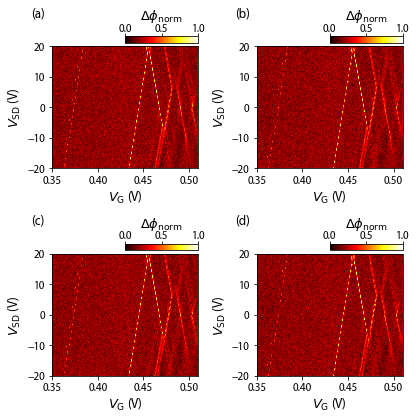

In [16]:
fig, axes = plt.subplots(2,2, figsize=[fig_width, fig_width])
plt.subplots_adjust(left=0.12,right=0.95,top=0.88,bottom=0.1,hspace = 0.7, wspace=0.4)#hspace

for i in range(2):
    for j in range(2):
        im = axes[i,j].pcolormesh(data['QD']['CDiamonds']['Vg_V'], data['QD']['CDiamonds']['Vsd_mV'], 
                                 data['QD']['CDiamonds']['phi_norm'], rasterized=True, cmap='hot')
        cbar=format2d(fig, axes[i,j], im, '$\Delta\phi_\mathrm{norm}$')
        
        
        
        #axes[i,j].plot(data['QD']['CDiamonds']['Vg_V'], data['QD']['CDiamonds']['phi_norm'][100,:])
        axes[i,j].set_xlabel('$V_\mathrm{G}$ (V)')
        axes[i,j].set_ylabel('$V_\mathrm{SD}$ (V)')

addLabels(fig, axes, ['(a)', '(b)', '(c)', '(d)'])

#fig.savefig('test.svg', dpi=500)